### Assignment 5 - The first portion of this notebook is my EDA from week 2 with further refinement. The creation of my first regression model is and resulting further feature engineering is at the bottom.

#### I have chosen to utilize crime statisitics provided by the Omaha Police Department as my first dataset. The data, which is publicly available in csv format on the <a href="https://police.cityofomaha.org/crime-information/incident-data-download" target="_blank" rel="noopener">Omaha Policy Department's website</a>, dates back from 2015 to present day. 2015 and September 2023 is only partial data so I will be removing each of those portions.

#### The data contains information about the date/time of incidents, their location (both physical street address and lat/long), a description of the incident, the police district in which it occurred, along with the incident number.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.concat(
    map(pd.read_csv, ['Incidents_2016.csv',
                      'Incidents_2017.csv',
                      'Incidents_2018.csv',
                      'Incidents_2019.csv',
                      'Incidents_2020.csv',
                      'Incidents_2021.csv',
                      'Incidents_2022.csv',
                      'Incidents_2023.csv',
                     ]), ignore_index=True)





In [2]:
df.head()

,RB Number,Reported Date,Reported Time,Statute/Ordinance Description,Occurred Location,Occurred District,Occurred Block LAT,Occurred Block LON
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181


In [3]:
df = df.rename(columns={"RB Number": "incident_number", "Reported Date": "incident_date", "Reported Time": "incident_time",
                   "Statute/Ordinance Description": "incident_description", "Occurred Location": "incident_location",
                   "Occurred District": "incident_district", "Occurred Block LAT": "incident_lat",
                   "Occurred Block LON": "incident_long"})
df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384470 entries, 0 to 384469
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       384470 non-null  object 
 1   incident_date         384470 non-null  object 
 2   incident_time         384470 non-null  object 
 3   incident_description  384470 non-null  object 
 4   incident_location     384305 non-null  object 
 5   incident_district     384470 non-null  int64  
 6   incident_lat          309422 non-null  float64
 7   incident_long         309422 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 23.5+ MB


#### Each district in which an incident occurs belongs to one of five segmented precincts:
    -Northwest
    -Northeast
    -Southwest
    -Southeast
    -West

#### I want to add a column that identifies each incident's precinct based on the district so that I may use it for EDA:

In [5]:
precinct = []

for row in df['incident_district']:
    if row in range(11,30): precinct.append('NW') # note range(inclusive, exclusive)
    elif row in range(31, 50) : precinct.append('NE')
    elif row in range(51, 69) : precinct.append('SE')
    elif row in range(71, 90) : precinct.append('SW')
    elif row in range(91, 108) : precinct.append('W')
    else: precinct.append('No Precinct')

df['incident_precinct'] = precinct

df.head()

,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,AH45311,01/01/2016,15:21:16,ASSAULT - FELONY - AGGRAVATED,S 75th St & Mercy Rd,76,41.237913,-96.028724,SW
1,AH45330,01/01/2016,00:11:46,DOMESTIC ASSAULT,5900 Grover St,72,41.227057,-96.003686,SW
2,AH45336,01/01/2016,00:20:24,ASSAULT - MISDEMEANOR - NO WEAPON,4700 N 39th St,37,41.301427,-95.971064,NE
3,AH45339,01/01/2016,01:08:31,PROT ORD-DOMESTIC ABUSE-1ST OFFENSE,10900 Cottonwood Plz,12,41.286141,-96.082313,NW
4,AH45340,01/01/2016,03:10:26,ASSAULT - MISDEMEANOR - NO WEAPON,N 36th St & Ames Ave,31,41.299533,-95.966181,NE


              count  percent
NW           103730     27.0
SW            79459     20.7
SE            78016     20.3
NE            75120     19.5
W             36884      9.6
No Precinct   11261      2.9


<Axes: title={'center': 'incident_precinct'}>

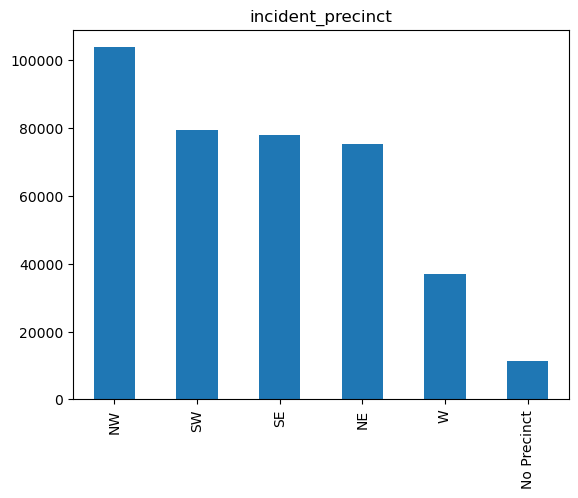

In [6]:
feature = 'incident_precinct'
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
feature_df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(feature_df)
count.plot(kind='bar', title=feature)

#### The 'No Precinct' results above generate from where the incident_district is labeled either 998 or 999 because there is incident_location indicated (entered as 'Unknown'). Because of this, I will separate these results from our dataframe but maintain in order to document how often incomplete incidents are being added.

In [7]:
complete_df = df[df['incident_precinct'] != 'No Precinct']
incomplete_df = df[df['incident_precinct'] == 'No Precinct']
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 373209 entries, 0 to 384469
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   incident_number       373209 non-null  object 
 1   incident_date         373209 non-null  object 
 2   incident_time         373209 non-null  object 
 3   incident_description  373209 non-null  object 
 4   incident_location     373112 non-null  object 
 5   incident_district     373209 non-null  int64  
 6   incident_lat          309269 non-null  float64
 7   incident_long         309269 non-null  float64
 8   incident_precinct     373209 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 28.5+ MB


#### Now I will review the various types of crimes to look for patterns by type and the precincts in which they occur.

In [8]:
print(complete_df["incident_description"].nunique())

254


In [9]:
temp = pd.crosstab(complete_df['incident_description'], complete_df['incident_precinct'], margins=True, margins_name='Total')
temp

incident_precinct,NE,NW,SE,SW,W,Total
incident_description,,,,,,
ABUSE VULNERABLE ADULT -EXPLOIT; FRAUD,22,31,23,24,19,119
"ABUSE VULNERABLE ADULT, KNOW & INTENT",6,8,4,10,4,32
AGG ASLT OFFICER/HEALTH CARE WORKER,0,8,8,5,2,23
ANIMAL BITE,67,79,55,42,16,259
ARSON,190,104,104,66,17,481
...,...,...,...,...,...,...
"UNLAWFUL ENTRY/THEFT -GARAGE, OTHER",122,457,151,482,253,1465
UNLAWFUL OCCUPANCY,52,39,82,32,5,210
VIOLATION OF CUSTODY,2,3,2,0,0,7


In [10]:
incident_description_feature = 'incident_description'
incident_description_count = complete_df[incident_description_feature].value_counts()
percent = 100*complete_df[incident_description_feature].value_counts(normalize=True)
incident_description_feature_df = pd.DataFrame({'count':incident_description_count, 'percent':percent.round(3)})
incident_description_feature_df



,count,percent
CRIMINAL MISCHIEF UNDER $500,32987,8.839
THEFT BY UNLAWFUL TAKING $200-$1499,25746,6.899
ASSAULT - MISDEMEANOR - NO WEAPON,23916,6.408
THEFT OF MOTOR VEHICLE - FELONY MV,22793,6.107
THEFT BY SHOPLIFT $500/LESS,20356,5.454
...,...,...
COMPUTER-UNAUTHOR ACCESS-UND $1000-ATT,1,0.000
MANSLAUGHTER,1,0.000
FAIL RET LEAS PRP $200/LESS -ATMPT,1,0.000
SELLING STOLEN PROPERTY,1,0.000


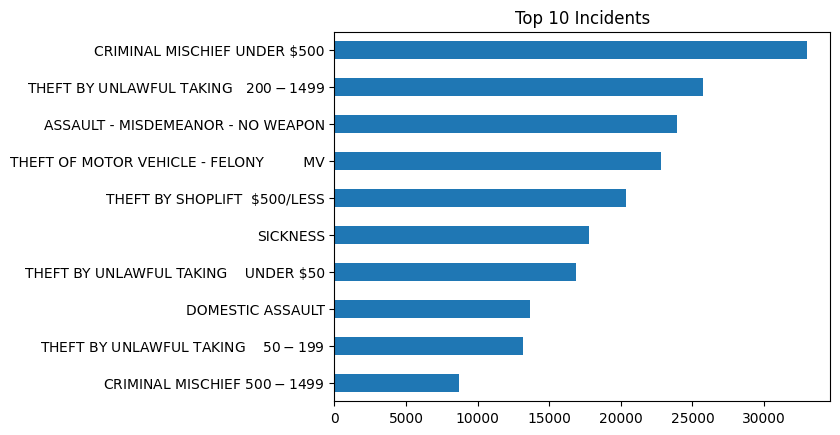

In [7]:
incident_description_count.head(10).plot(kind='barh', title="Top 10 Incidents")
plt.gca().invert_yaxis()

#### Now I'm going to group the data by month and year to see if there are any trends year over year.

In [11]:
complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])
crime_by_month = complete_df.groupby(pd.Grouper(key='incident_date', freq='M')).count()
crime_by_month.reset_index(inplace=True)
crime_by_month

/var/folders/tr/lrj2g9jj48b3h_1g08xgzp8r0000gn/T/ipykernel_4951/1918080354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['incident_date'] = pd.to_datetime(complete_df['incident_date'])


,incident_date,incident_number,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,incident_precinct
0,2016-01-31,3533,3533,3533,3533,3533,3421,3421,3533
1,2016-02-29,3212,3212,3212,3212,3212,3116,3116,3212
2,2016-03-31,3582,3582,3582,3582,3582,3462,3462,3582
3,2016-04-30,3589,3589,3589,3589,3589,3467,3467,3589
4,2016-05-31,4012,4012,4012,4012,4012,3848,3848,4012
...,...,...,...,...,...,...,...,...,...
88,2023-05-31,4716,4716,4716,4709,4716,4679,4679,4716
89,2023-06-30,4659,4659,4659,4654,4659,4618,4618,4659
90,2023-07-31,5273,5273,5273,5264,5273,5224,5224,5273
91,2023-08-31,4727,4727,4727,4715,4727,4672,4672,4727


In [12]:
crime_by_month.drop(crime_by_month[crime_by_month['incident_date'] == '2023-09-30'].index, inplace=True)

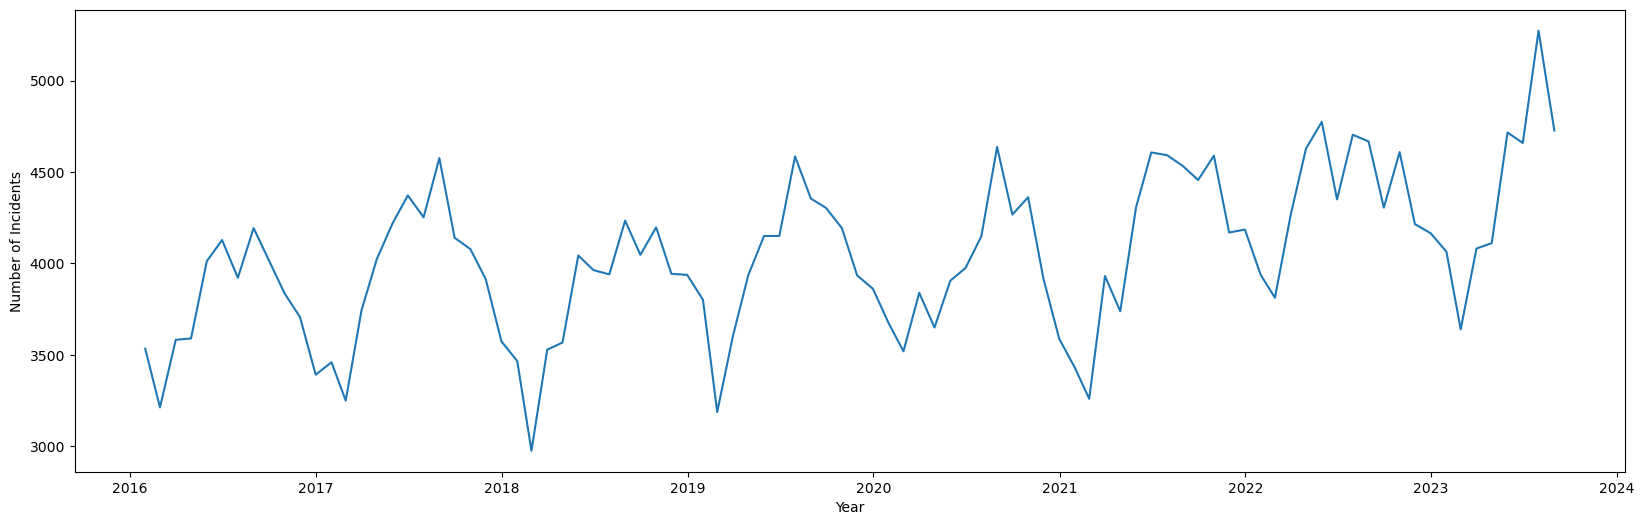

In [13]:
plt.figure(figsize=(20,6))
plt.plot(crime_by_month['incident_date'], crime_by_month['incident_number'])
plt.xlabel("Year")
plt.ylabel("Number of Incidents")

plt.show()

#### There is clearly some sort of trend as far as the ebb and flow of the number of incidents. A first guess would be due to seasonality -- namely weather, and temperature. Also, it doesn't appear there was any spike due to COVID-19 from 2020-2022. Now I'll import the average temperature (from the <a href="https://www.weather.gov/wrh/Climate?wfo=oax">NOAA/NWS website</a>) - each month to compare that to the figure above to see if there's a relationship.

In [19]:
temperature_df = pd.read_csv("omaha_temperature_data.csv")
temperature_df = temperature_df.set_index('Year')
temperature_df = temperature_df.drop(columns=['Annual'])
temperature_df


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2016,24.3,34.2,47.5,55.0,63.1,78.7,77.8,75.9,70.8,58.9,47.3,26.9
2017,27.7,37.7,43.3,54.4,63.1,75.7,80.1,72.5,70.6,55.3,40.7,27.4
2018,23.3,24.0,40.3,44.9,70.6,77.6,77.5,76.0,69.4,51.6,33.7,29.6
2019,24.5,17.6,35.5,54.9,62.0,74.2,78.6,75.4,73.6,49,37.4,32.3
2020,26.4,30.8,44.1,51.1,59.8,78.1,79.2,77.2,65.7,49.5,44,29.7
2021,28.5,16.3,46.1,53.2,62.1,77.7,77.7,78.0,71,57.9,44.5,35.9
2022,22.8,28.3,40.7,50.2,64.7,75.0,78.2,76.7,68.9,54.2,37.6,24.3
2023,26.8,30.2,36.5,52.9,66.8,75.5,75.6,76.5,M,M,M,M


In [20]:
temperature_df.columns = range(1,13)
s = temperature_df.stack()
year = s.index.get_level_values(0).values
month = s.index.get_level_values(1).values
pd.PeriodIndex(year=year, month=month, freq='M')
s.index = pd.PeriodIndex(year=year, month=month, freq='M')

temperature_df = pd.DataFrame(s)
temperature_df

,0
2016-01,24.3
2016-02,34.2
2016-03,47.5
2016-04,55.0
2016-05,63.1
...,...
2023-08,76.5
2023-09,M
2023-10,M
2023-11,M


In [21]:
#temperature_df = temperature_df.reset_index().rename(columns={0: "temp", "index": "date"}) #-- needed only on first run but not if rerunning the code below

temperature_df['date'] = temperature_df['date'].astype(str)
temperature_df['date'] = pd.to_datetime(temperature_df['date'])
temperature_df.drop(temperature_df[temperature_df['temp'] == "M"].index, inplace=True)
temperature_df['temp'] = temperature_df['temp'].astype(float)
temperature_df.dtypes


date    datetime64[ns]
temp           float64
dtype: object

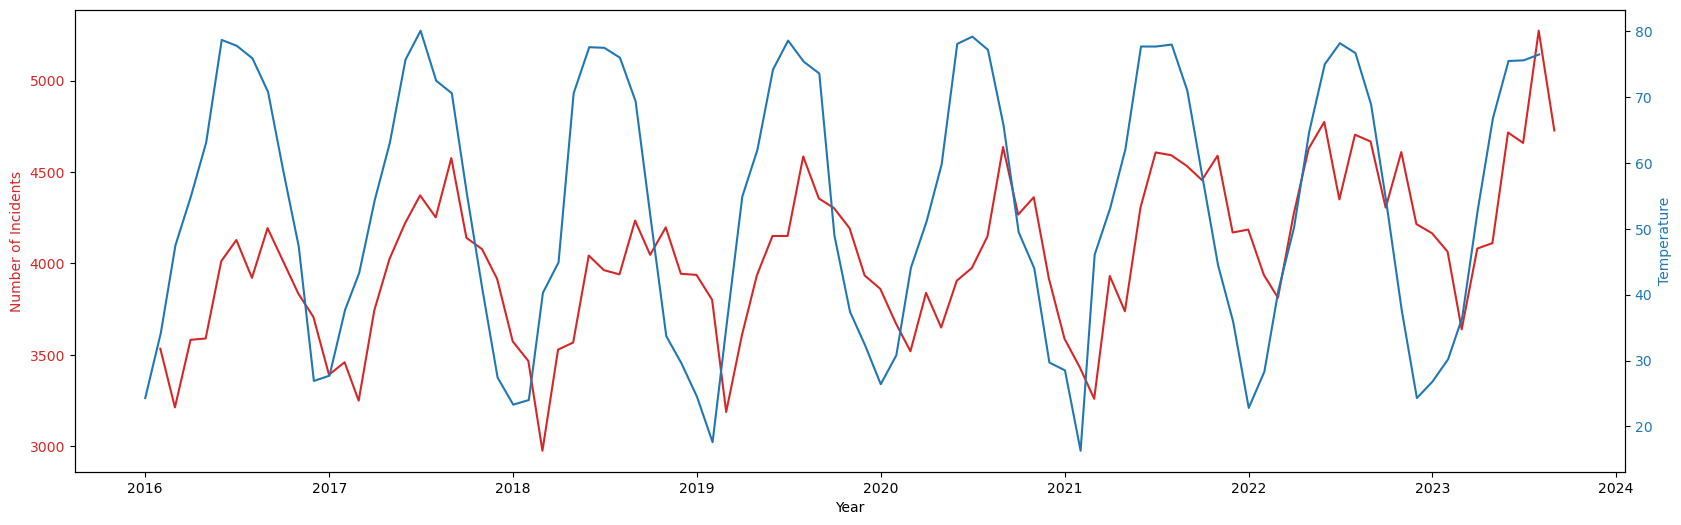

In [22]:
fig, ax1 = plt.subplots(figsize=(20,6))

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Incidents', color=color)
ax1.plot(crime_by_month['incident_date'], crime_by_month['incident_number'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Temperature', color=color)
ax2.plot(temperature_df['date'], temperature_df['temp'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

## The beginning of creating my first model for Assignment #4:

In [23]:
w = np.mean(crime_by_month['incident_number']/temperature_df['temp'])
print(w)

87.51594626080295


In [24]:
def first_ml_model(temp):
  return w * temp

In [25]:
temperatures = np.arange(10, 100, 10)
preds = first_ml_model(temperatures)
first_pred = pd.DataFrame({"Temp": temperatures, "Predicted # of Incidents": preds})
first_pred

,Temp,Predicted # of Incidents
0,10,875.159463
1,20,1750.318925
2,30,2625.478388
3,40,3500.637850
4,50,4375.797313
5,60,5250.956776
6,70,6126.116238
7,80,7001.275701
8,90,7876.435163


In [26]:
X = temperature_df[['temp']]
y = crime_by_month['incident_number']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
sns.scatterplot(x = X_train, y = y_train) # throws ValueError: Data must be 1-dimensional due to getting X as a dataframe that is 2D

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
ml_reg = LinearRegression()

ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)
#print(ml_reg.score(X_test, y_test))
print("Coefficients: \n", ml_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficients of determination (R2 Score): %.2f" % r2_score(y_test, y_pred))

#y_pred_ml_reg = ml_reg.predict(X_test)
#y_pred_ml_reg

Coefficients: 
 [16.37983879]
Mean squared error: 106565.63
Coefficients of determination (R2 Score): -0.09


### Beginning of Feature Engineering for Milestone 3 (Assignment #5)

#### I have identified that group incidents by month gives me less granular data than if I had them by day which is present in the data. I'll need to import the daily temperate from the NOAA/NWS website as I only currently have monthly averages. Additionally, I will the categorical features of the districts in which these incidents occur and assign them dummy variables in order to use for evaluation.

#### Import daily temperature data for more granular view per day:

In [29]:
daily_temp_df = pd.read_csv('omaha_daily_temperature_data.csv')
daily_temp_df

,DATE,DLY-TAVG-NORMAL
0,01/01/2023,25.0
1,01/02/2023,24.9
2,01/03/2023,24.8
3,01/04/2023,24.6
4,01/05/2023,24.5
...,...,...
361,12/27/2023,25.8
362,12/28/2023,25.6
363,12/29/2023,25.4
364,12/30/2023,25.3


In [30]:
daily_temp_df['DATE'] = daily_temp_df['DATE'].astype(str)
daily_temp_df['DATE'] = pd.to_datetime(daily_temp_df['DATE'])
daily_temp_df = daily_temp_df.rename(columns={"DATE": "date", "DLY-TAVG-NORMAL": "daily_avg_temp"})
daily_temp_df

,date,daily_avg_temp
0,2023-01-01,25.0
1,2023-01-02,24.9
2,2023-01-03,24.8
3,2023-01-04,24.6
4,2023-01-05,24.5
...,...,...
361,2023-12-27,25.8
362,2023-12-28,25.6
363,2023-12-29,25.4
364,2023-12-30,25.3


In [31]:
daily_temp_df['date_MM_DD'] = daily_temp_df['date'].dt.strftime('%m-%d')
#daily_temp_df = daily_temp_df.drop(daily_temp_df.index[59]) # drop Feb. 29th by row since it duplicates date as 02-01 -- RUN ONLY ONCE OTHERWISE IT ROW 59 WILL CONTINUE TO BE DELETED
daily_temp_df

,date,daily_avg_temp,date_MM_DD
0,2023-01-01,25.0,01-01
1,2023-01-02,24.9,01-02
2,2023-01-03,24.8,01-03
3,2023-01-04,24.6,01-04
4,2023-01-05,24.5,01-05
...,...,...,...
361,2023-12-27,25.8,12-27
362,2023-12-28,25.6,12-28
363,2023-12-29,25.4,12-29
364,2023-12-30,25.3,12-30


In [32]:
#complete_df['date_MM_DD'] = complete_df['incident_date'].dt.strftime('%m-%d') # -- run only first time
complete_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 373209 entries, 0 to 384469
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   incident_number       373209 non-null  object        
 1   incident_date         373209 non-null  datetime64[ns]
 2   incident_time         373209 non-null  object        
 3   incident_description  373209 non-null  object        
 4   incident_location     373112 non-null  object        
 5   incident_district     373209 non-null  int64         
 6   incident_lat          309269 non-null  float64       
 7   incident_long         309269 non-null  float64       
 8   incident_precinct     373209 non-null  object        
 9   date_MM_DD            373209 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 31.3+ MB


/var/folders/tr/lrj2g9jj48b3h_1g08xgzp8r0000gn/T/ipykernel_4951/3727977441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complete_df['date_MM_DD'] = complete_df['incident_date'].dt.strftime('%m-%d') # -- run only first time


#### Create dataframes for each precinct:

In [33]:
#complete_df['date_MM_DD'] = pd.to_datetime(complete_df['date_MM_DD']) -- get an out of bounds error due to the time
crime_by_day = complete_df.groupby(['date_MM_DD', 'incident_precinct']).count()
crime_by_day.reset_index(inplace=True)
crime_by_day = crime_by_day.drop(crime_by_day[crime_by_day['date_MM_DD'] == '02-29'].index) # drop Feb. 29th since it skews data
crime_by_day

,date_MM_DD,incident_precinct,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long
0,01-01,NE,215,215,215,215,215,215,191,191
1,01-01,NW,236,236,236,236,236,236,200,200
2,01-01,SE,222,222,222,222,222,222,201,201
3,01-01,SW,214,214,214,214,214,214,175,175
4,01-01,W,97,97,97,97,97,97,79,79
...,...,...,...,...,...,...,...,...,...,...
1825,12-31,NE,168,168,168,168,168,168,137,137
1826,12-31,NW,193,193,193,193,193,193,151,151
1827,12-31,SE,173,173,173,173,173,173,143,143
1828,12-31,SW,157,157,157,157,157,157,114,114


In [35]:
'''
### run only first time then comment out:
crime_NE = crime_by_day.loc[crime_by_day['incident_precinct'] == 'NE'].reset_index(drop=True)
crime_NW = crime_by_day.loc[crime_by_day['incident_precinct'] == 'NW'].reset_index(drop=True)
crime_SE = crime_by_day.loc[crime_by_day['incident_precinct'] == 'SE'].reset_index(drop=True)
crime_SW = crime_by_day.loc[crime_by_day['incident_precinct'] == 'SW'].reset_index(drop=True)
crime_W = crime_by_day.loc[crime_by_day['incident_precinct'] == 'W'].reset_index(drop=True)
'''

crime_NE_plus_temp = pd.merge(crime_NE, daily_temp_df, on='date_MM_DD')
crime_NW_plus_temp = pd.merge(crime_NW, daily_temp_df, on='date_MM_DD')
crime_SE_plus_temp = pd.merge(crime_SE, daily_temp_df, on='date_MM_DD')
crime_SW_plus_temp = pd.merge(crime_SW, daily_temp_df, on='date_MM_DD')
crime_W_plus_temp = pd.merge(crime_W, daily_temp_df, on='date_MM_DD')

crime_W_plus_temp

,date_MM_DD,incident_precinct,incident_number,incident_date,incident_time,incident_description,incident_location,incident_district,incident_lat,incident_long,date,daily_avg_temp
0,01-01,W,97,97,97,97,97,97,79,79,2023-01-01,25.0
1,01-02,W,87,87,87,87,86,87,73,73,2023-01-02,24.9
2,01-03,W,123,123,123,123,123,123,84,84,2023-01-03,24.8
3,01-04,W,109,109,109,109,109,109,84,84,2023-01-04,24.6
4,01-05,W,94,94,94,94,94,94,73,73,2023-01-05,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...
361,12-27,W,114,114,114,114,114,114,53,53,2023-12-27,25.8
362,12-28,W,89,89,89,89,89,89,44,44,2023-12-28,25.6
363,12-29,W,83,83,83,83,83,83,55,55,2023-12-29,25.4
364,12-30,W,100,100,100,100,100,100,54,54,2023-12-30,25.3


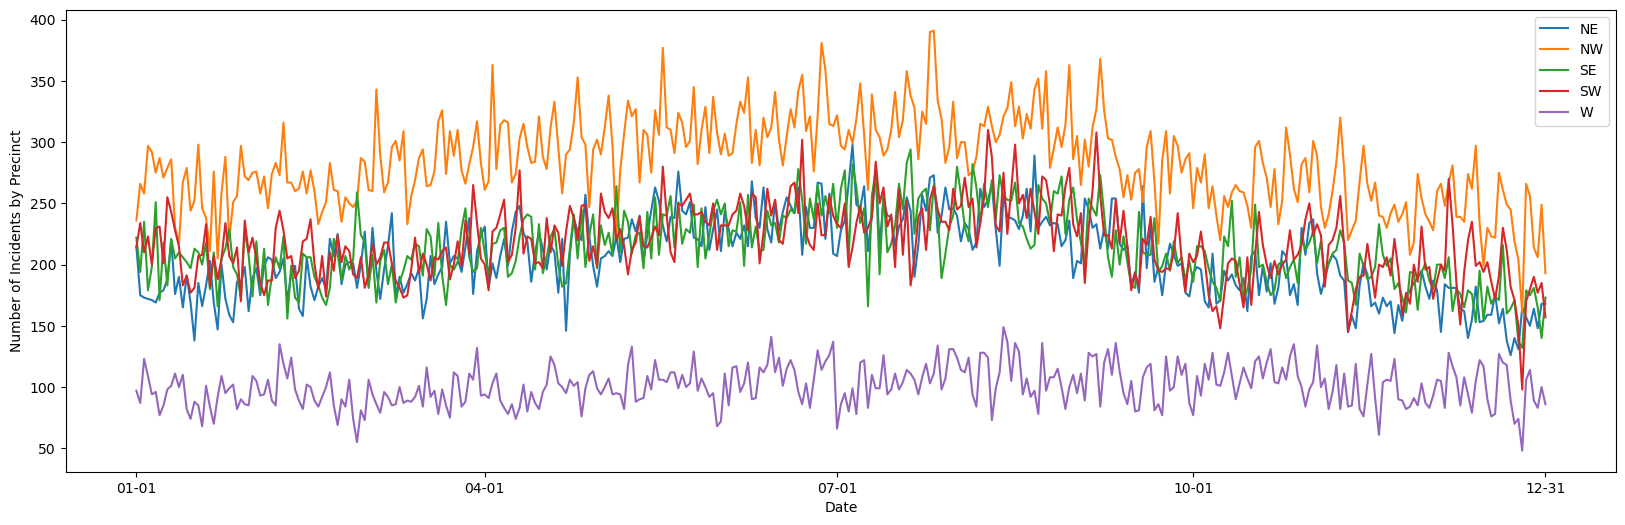

In [36]:
plt.figure(figsize=(20,6))
plt.plot(crime_NE['date_MM_DD'], crime_NE['incident_number'], label='NE')
plt.plot(crime_NW['date_MM_DD'], crime_NW['incident_number'], label='NW')
plt.plot(crime_SE['date_MM_DD'], crime_SE['incident_number'], label='SE')
plt.plot(crime_SW['date_MM_DD'], crime_SW['incident_number'], label='SW')
plt.plot(crime_W['date_MM_DD'], crime_W['incident_number'], label='W')
desired_ticks = ['01-01', '04-01', '07-01', '10-01', '12-31']
plt.xticks(desired_ticks)
plt.xlabel("Date")
plt.ylabel("Number of Incidents by Precinct")
plt.legend()
plt.show()


#### Model creation using daily temperature and number of incidents by precinct (testing on NE precinct):

In [37]:
# Trying model creation on NE precinct first --

j = np.mean(crime_NE_plus_temp['incident_number']/crime_NE_plus_temp['daily_avg_temp'])
print(j)

def second_ml_model(temp):
  return j * temp

4.3847332193024275


In [38]:
temperatures = np.arange(10, 100, 10)
preds = second_ml_model(temperatures)
second_pred = pd.DataFrame({"Temp": temperatures, "Predicted # of Incidents": preds})
second_pred

,Temp,Predicted # of Incidents
0,10,43.847332
1,20,87.694664
2,30,131.541997
3,40,175.389329
4,50,219.236661
5,60,263.083993
6,70,306.931325
7,80,350.778658
8,90,394.625990


In [39]:
X1 = crime_NE_plus_temp[['daily_avg_temp']]
X_plot = crime_NE_plus_temp['daily_avg_temp']
y1 = crime_NE_plus_temp['incident_number']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

ml_reg = LinearRegression()

ml_reg.fit(X_train, y_train)
y_pred = ml_reg.predict(X_test)
print(ml_reg.score(X_test, y_test))
print("Coefficients: \n", ml_reg.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficients of determination (R2 Score): %.2f" % r2_score(y_test, y_pred))

0.5552875053321242
Coefficients: 
 [1.24241867]
Mean squared error: 483.50
Coefficients of determination (R2 Score): 0.56


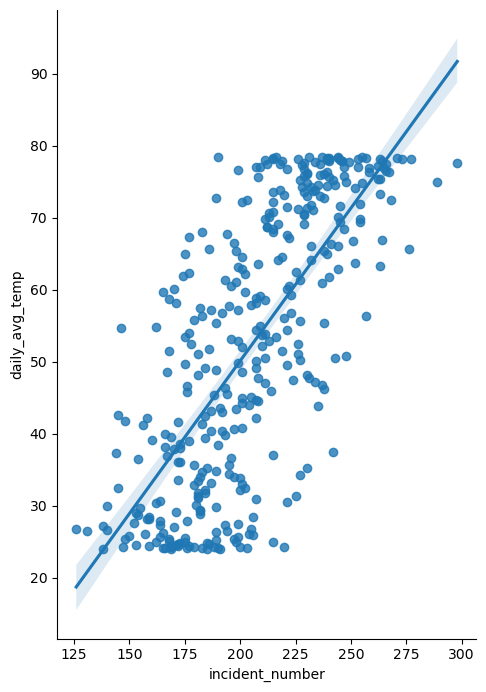

In [41]:
sns.pairplot(crime_NE_plus_temp, x_vars=['incident_number'], y_vars=['daily_avg_temp'], height=7, aspect=0.7, kind='reg')

In [48]:
y_new = ml_reg.predict([[50]])
print(y_new)

[203.22208599]


/Users/kevin/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [49]:
import joblib

joblib.dump(ml_reg, './model/ml_reg.h5')

['./model/ml_reg.h5']